# JupyterCon 2020
# A Notebook Style Guide

---

Kunal Bhalla (@kunalbhalla)

Software Engineer, Facebook

## For writing readable and maintainable notebooks.

This talk is a collection of opinionated heuristics that should help you create maintainable, readable notebooks.

For those of you new to the wonderful world of interactive notebooks, who haven't yet had the pleasure of attempting to decipher their own -- or a colleague's -- notebooks, I hope I can give you some suggestions to write notebooks in a way that minimizes regret.

For those of you with a lot of experience writing notebooks: treat this like a discussion, and I'd love to hear which of these heuristics you already apply and which ones you vehemently disagree with.

It is obviously opinionated: you should apply it taking into account the context, and with a pinch of taste.

## About Me

- ~9 years as a Software Engineer.
- ~6 years playing with Notebooks.
- ~1 year building infrastructure for Notebooks @ Facebook.
  - as part of "AI & Data Developer Experience".
- Not very qualified to write a style guide...
    - ...but it seemed like one would be valuable. 
    - See also: [Cunningham's law](https://meta.wikimedia.org/wiki/Cunningham%27s_Law).

I've been working as a Software Engineer at Facebook for the past several years: working across Server side reliability, Android -- Reliability, Maps, Checkins and Battery, Site integrity -- and most recently the Jupyter notebooks at Facebook (you should check out the talk on Bento at JupyterCon).

I've been using notebooks sporadically for a large part of my career: prototyping code, parsing and debugging stack traces, investigating bugs, visualizing logs, diving into data and trends -- and building reusable tools-as-notebooks.

That said, I'm not specifically qualified to write a style guide -- most data scientists, engineers will have spent much more time living in notebooks. I was surprised by the lack of public style guides (I could only find one, slightly specific one, which I'll point you to later) and decided that at the very least it's worth getting something started.

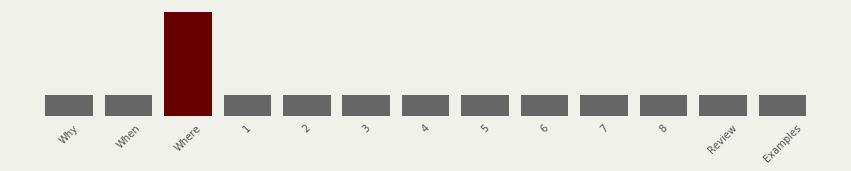

In [26]:
import matplotlib.pyplot as plt

labels = ["Why", "When", "Where"] + [str(x) for x in range(1, 9)] + ["Review", "Examples"]

def show_graph(position):
    xs = list(range(len(labels)))
    ys = [1 for x in xs]
    if position >= 0:
        ys[position] = 5
    
    plt.figure(figsize=(15, 2), facecolor='#F0F1EB')    
    plt.box(False)
    plt.tick_params(
        axis='y',
        which='both',
        labelleft=False,
        labelright=False,
        left=False,
        right=False)
    plt.tick_params(
        axis='x',
        which='both',
        labelbottom=True,
        labeltop=False,
        bottom=False,
        top=False)
    plt.grid(None)
    plt.xticks(range(len(labels)), labels, rotation=45)
    plt.bar(xs, ys, color=["#666666" if x != position else "#660000" for x in xs])
    
    plt.show()
    plt.close()
    
show_graph(2)

## Why have a style guide at all?
* An opinionated path in an infinite sea of possibilities.
* Acts as a checklist to sanity check your notebooks.
* Consistency across your notebooks.
* Easier to read and write with the same expectations.
* Notebooks are *both* programs and prose.

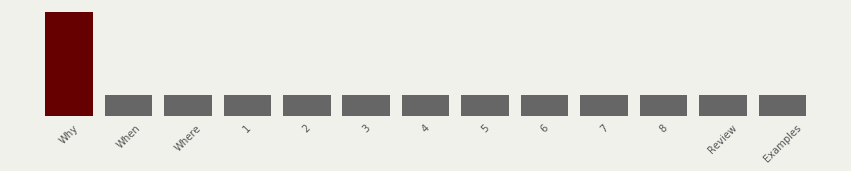

In [27]:
show_graph(0)

If, like me, your first exposure to style guides was only in the context of programming I should tell you that they have a significantly longer and richer history. They're for documents. Notebooks are both prose and programs -- following consistent style guides can help make consistent, high quality notebooks.

As an author. Jupyter is an incredibly flexible platform: a REPL with state you choose to preserve. Having a style guide helps choose one way to do things that can help you navigate common pitfalls and problems from other peoples' mistakes; in this case -- mine. Style guides can be your checklist for validating and verifying work. 

As a reader. For people working across teams, a consistent style guide also means it's much easier to pick up and work with another person's notebook -- your expectations around how to get the notebook up and running, and how the notebook was created are constant and don't need to be re-evaluated every time you start reading a new notebook.



# When to use the style guide
* If you reasonably expect to read or run the notebook ever again.
* If you reasonably expect *someone else* to read or run the notebook.
* Otherwise, it's probably not worth the effort.

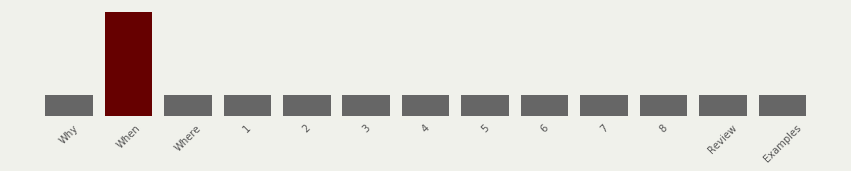

In [28]:
show_graph(1)

Notebooks can be used for many, many purposes: they can be used to share an analysis; they could be used as an executable tutorial, or even exercise; they can be used to quickly build and iterate on tools without having to deal with Javascript; or you could be using them for ad-hoc explorations or simply testing out code conveniently.

The rule of thumb I like to apply is fairly simple: is there any chance that I, or someone else would expect to use this notebook again? You don't want to carefully structure and maintain notebooks that will slowly decay on your hard disk.

# Where to use this style guide

* In (non-reactive) computational notebooks, particularly... Jupyter.
* Client agnostic, because we're spoilt for choice.

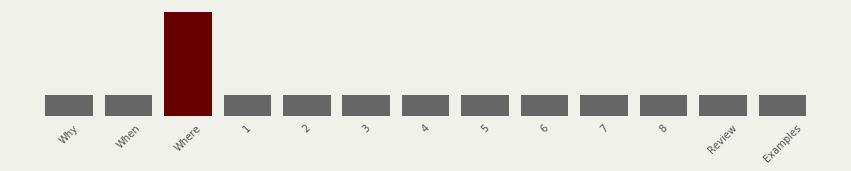

In [29]:
show_graph(2)

I started counting for this presentation: over the past few years, I've used Jupyter notebooks, Jupyter Lab, tried out Hydrogen, Emacs-Ipython-notebooks, org-mode with an iPython backend, Facebook's custom solution, VSCode's custom solution and more UIs for working with notebooks. I'm sure I'll play with several more in the future.

I've tried to keep this talk client agostic as far as possible: I hope you can apply it irrespective of the type of client.

And finally...


# **The Style Guide**




You were probably wondering if I was ever actually going to walk through the style guide, or if this was an elaborate troll. It's not. Seriously.

## 1. Explicitly, consciously manage global state. 
## —  Use pure functions for everything else. 

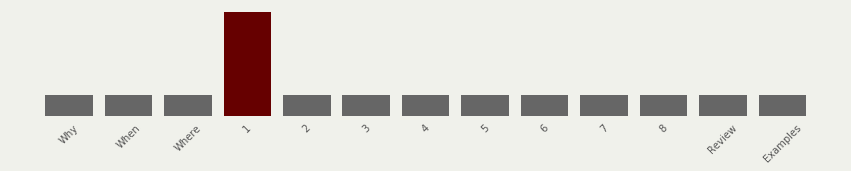

In [30]:
show_graph(3)

## Notebooks have Tons and Tons of hidden state that's easy to screw up and difficult to reason about.
### - Joel Grus, JupyterCon 2018

Do this ONE thing to make your notebooks easy to work with.

Seriously though, state is pretty hard to manage and you want to be sure you're managing it well.

# Global state: based on the point of the notebook.

Some examples: 

If you're doing an analysis, the most important part is the data core to the notebook: thread the dataframe through the notebook

If you're writing a tool, capture the user's input as the first -- or one of the first -- cells. Fetched data based on the input that will manipulated or displayed forms the counterpoint, and the second function you can use.

## Dramatic Re-enactment
aka painfully contrived example

In [31]:
exp = 2

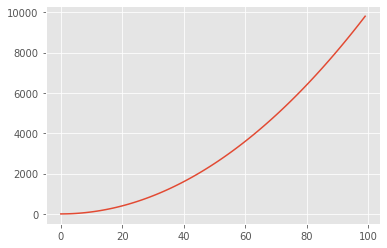

In [32]:
# Plot 

def slow_and_long_function():
    return list(range(100))

# cheap stand-in for a very long and slow function
xs = slow_and_long_function()
ys = [x ** exp for x in xs]

from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.plot(xs, ys)
plt.show()
plt.close()

In [33]:
# Also need to plot cubic too
exp = 3

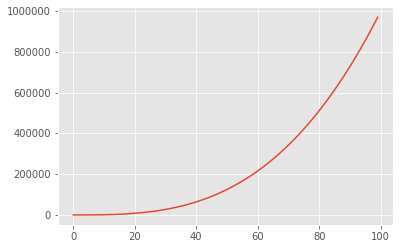

In [34]:
# Copy paste in the previous function except for the slow part

ys = [x ** exp for x in xs]

from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.plot(xs, ys)
plt.show()
plt.close()

### [3 days later...](https://www.youtube.com/watch?v=_8KGlebWqTQ)

(voiceover)



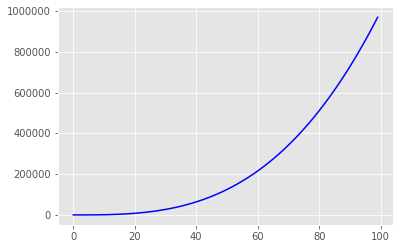

In [35]:
# ^2 and ^3 look really similar; 
# let's change ^2 to blue by editing and re-executing.
# xs = slow_and_long_function()
ys = [x ** exp for x in xs]

from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.plot(xs, ys, color="blue")
plt.show()
plt.close()

In [36]:
exp

3

## Instead

In [37]:
# After reading this style guide

# Preferably somewhere near the beginning of the notebook
from matplotlib import pyplot as plt
plt.style.use('ggplot')


def explore_data(xs, *, exp, color="red"):
    plt.plot(xs, [x ** exp for x in xs], color=color)
    plt.show()
    plt.close()

In [38]:
xs = slow_and_long_function()

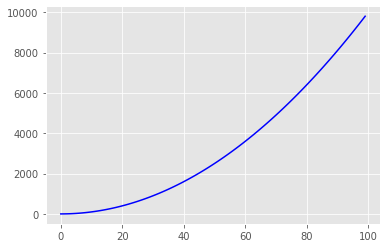

In [39]:
explore_data(xs, exp=2, color="blue")

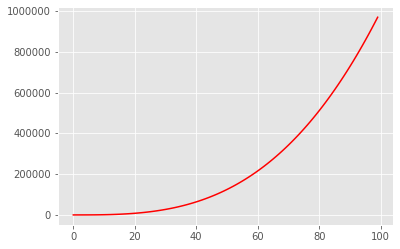

In [40]:
explore_data(xs, exp=3)

Dramatic re-enactment:

Rely on pure: side-effect-free, composable functions for your sanity -- because it is a pure function, you know exactly what's going in and being used; you can run it in isolation of the rest of the notebook without being surprised.

If you have too many functions that accept state, or no functions at all you'll have to spend much more time and effort figuring out what went in, what's coming out. Basically the same problems conventional stateful programming runs into, except that even the order of execution is now variable, and depends on humans (ugh).

It's like the worst possible threading bug: you aren't getting *any* performance benefit, but you still have to reason about and protect against potential out of order execution.

If you keep small, composable, and pure functions ...

## 2. Add small tests and assertions throughout the code

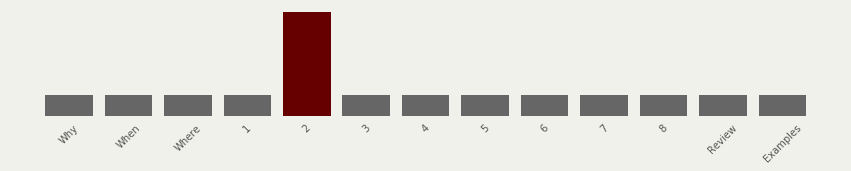

In [41]:
show_graph(4)

When you have large complex notebooks that you need to debug, it can be extraordinarily painful to figure out *where* things are going wrong; by keeping mostly independent tiny functions -- you can have minimal, quick sanity checks throughout the code. 

They'll also help you quickly iterate on the function where you keep the function definition and test in the same cell; keep editing and testing the function with repeated applications of `Ctrl + Enter` with trivial, simple inputs.

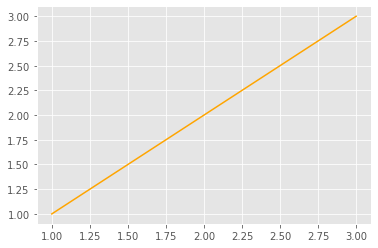

In [42]:
def explore_data(xs, exp, color):
    plt.plot(xs, [x ** exp for x in xs], color=color)
    plt.show()
    plt.close()
    
explore_data([1, 2, 3], 1, "orange")

## 3. Liberally add headings to create structure.

[JupyterLab ToC](https://github.com/jupyterlab/jupyterlab-toc)
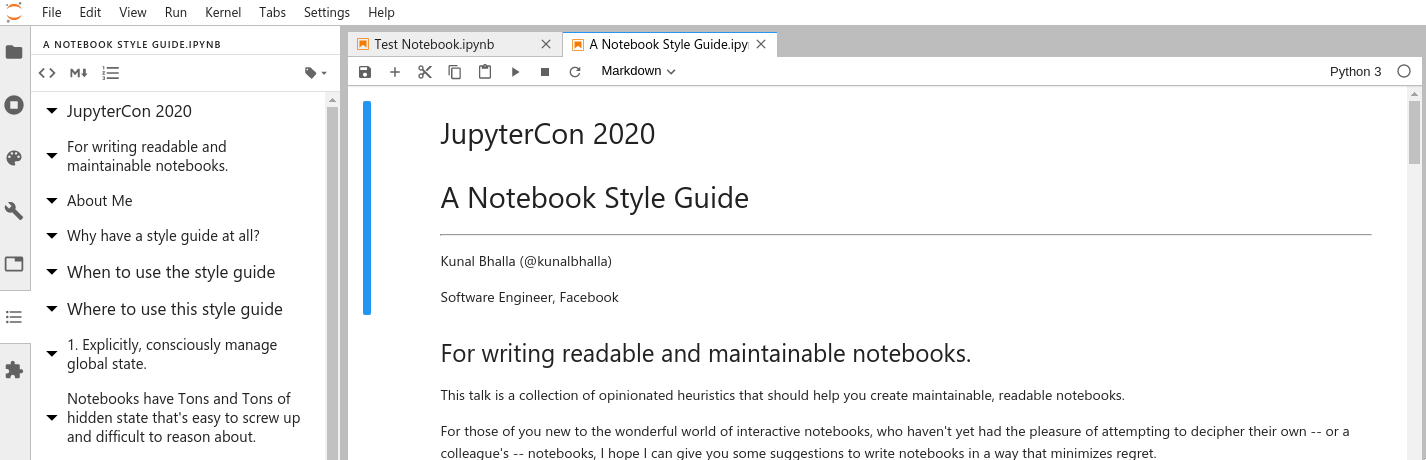

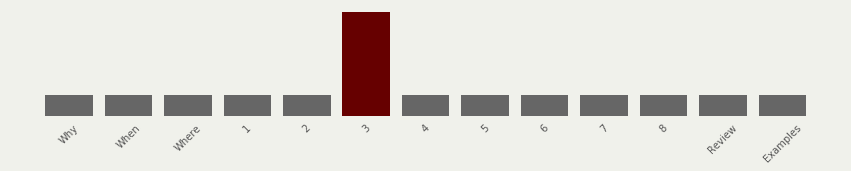

In [43]:
show_graph(5)

This one should be self explanatory: particularly for large, complex notebooks having headings means it's much easier to jump to the appropriate section. Assuming you're following the suggestions I gave earlier, you can execute all the code in each section independently as well to test it out quickly.

Keep the sections cohesive with related functions grouped together, and functions far apart loosely coupled.

Most good clients also have a table of contents extension that makes it even more valuable.

You'll also find it extremely useful for any tools you make: it's much easier to jump around, or back to change the inputs being passed in.

#### Speaking of structure,

## 4. The notebook must be executable top-to-bottom with a run all.


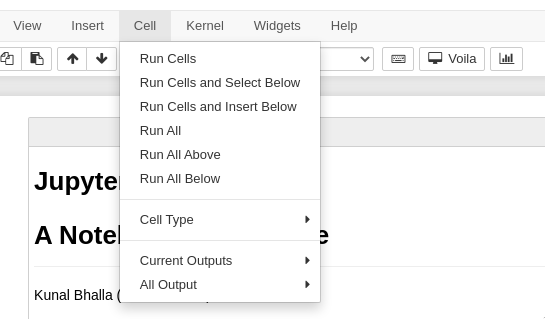

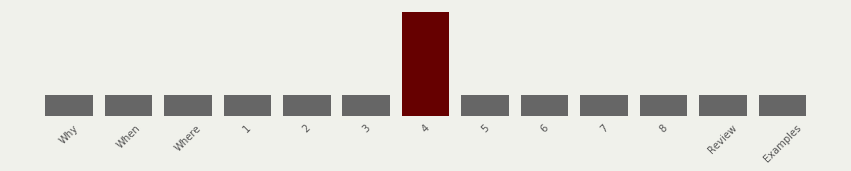

In [44]:
show_graph(6)

A quick and easy sanity check that helps ensure you've taken good care while writing your notebook is to make sure it executes cleanly from top to bottom without any accidental dependencies.

Hopefully your structure builds up correctly that any problems can be easily solved; with minimal, pure functions the data flow and dependencies should be very obvious and should flow downwards.

## [Programming Bottom-up, Paul Graham](http://www.paulgraham.com/progbot.html)

"[...] they follow a principle which could be called bottom-up design-- changing the language to suit the problem. In Lisp, you don't just write your program down toward the language, you also build the language up toward your program. As you're writing a program you may think "I wish Lisp had such-and-such an operator." So you go and write it. Afterward you realize that using the new operator would simplify the design of another part of the program, and so on. Language and program evolve together. **Like the border between two warring states, the boundary between language and program is drawn and redrawn, until eventually it comes to rest along the mountains and rivers, the natural frontiers of your problem.** In the end your program will look as if the language had been designed for it. And when language and program fit one another well, you end up with code which is clear, small, and efficient."

Forcing linear execution breaks literate programming: you're no longer putting code where it would make the most sense to read, but are forced to define helper routines up front. That said, it's not such a bad thing in general: it tends to force you to do a little bit of bottom-up programming where you assemble your tools and then apply them.

The benefit of not having to think about execution order is also a significant boost in productivity: there are no hidden surprises.

## 5. Notebooks must be meaningfully reproducible.

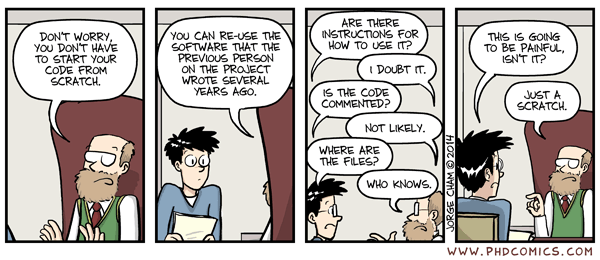
["Piled Higher and Deeper" by Jorge Cham
www.phdcomics.com](http://phdcomics.com/comics/archive.php?comicid=1689) -- Scratch

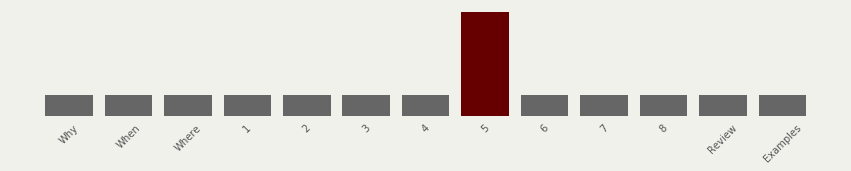

In [45]:
show_graph(7)

### Record the requirements to reproduce your notebook.
* Code dependencies (requirements.txt, perhaps a backing repository)
* *Data* dependencies (data dumps, query instructions)
* Hardware resources (a description)
* Strange websites on the internet (?)
* Controlling for randomness, if necessary (random.seed)


Think through what it takes to be able to meaningfully re-run the notebook: capture the python libraries you need, perhaps with a requirements.txt and a virtual environment.

The next step is to make sure that the unfortunate person re-using your notebook can access the data that powers it: if it's small enough, maybe you can package it with the notebook; if it's not -- add pointers to fetching the data. Make it easy to fetch or generate; it could even be simply documenting the expected schema.

Do you TPUs and magic hardware? Perhaps a quantum computer or three. Call it out -- I'd rather not find out I need a specific GPU after spending hours diagnosing errors I don't really understand.

Does it download data from the internet: do you believe the source will survive long enough? Or will it be available in archive.org? Can it be recreated in some other way.

If randomness is crucial to the notebook (perhaps you're creating generative art?) then you also have to control entropy. Apparently [Darkseid](https://powerlisting.fandom.com/wiki/Entropy_Manipulation) and a few select others have this power, the rest of us mortals can rely on explicitly setting random seeds.

## 6. Eliminate clutter across code, prose and outputs.

"Look for clutter in your writing and prune it ruthlessly. Be grateful for everything you can throw away. Reexamine each sentence you put on paper. Is every word doing new work? Can any thought be expressed with more economy? Is anything pompous or pretentious or faddish? Are you hanging on to something useless just because you think it's beautiful?

Simplify, simplify."

— On Writing Well, William Zinsser

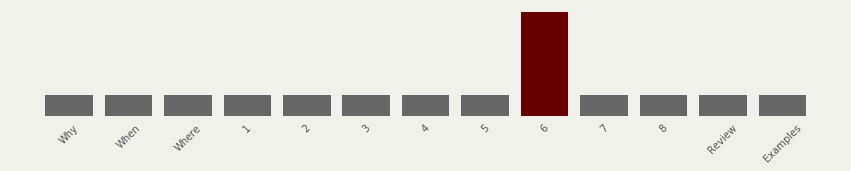

In [46]:
show_graph(8)

* Extract code to libraries.

* Strip unnecessary words.

* Simplify and capture outputs.

I'm stealing shamelessly from a much better style guide that I'll be pointing you to anyways; except that I'll generalize even further.

You're writing your notebook to illustrate a point or build a tool: what you keep in the notebook should be directly relevant to the purpose of the notebook. 

If you have a lot of helper functions that are self-explanatory from their titles, move them into utility libraries with unit tests and document them well; reduce the noise from the point you're making in the notebook. Don't simply hide *everything*: still retain context to explain what you're talking about.


Strip unnecessary words, jargon, superfluous adjectives. Tighten up the written content.


Delete stray outputs you don't care to see: one particularly common and annoying example is a *lot* of logs. Set the log level correctly, hide them. Perhaps with %capture to remove noisy libraries.

## 7. Treat the prose with care.

- *On Writing Well*, William Zinsser
  - "Thinking clearly is a conscious act that writers must force on themselves,"
- *The Elements of Style*, Strunk & White
  - "Writing is one way to go about thinking, and the practice and habit of writing not only drain the mind but supply it, too."

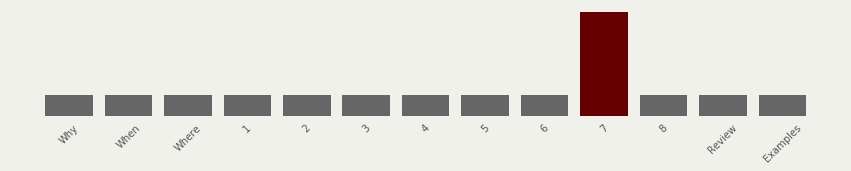

In [47]:
show_graph(9)

I have to admit: as a *software* engineer, if it's not in monospace, I'm probably not giving it anywhere near the care and attention it deserves.

Notebooks are as much prose as code: and the prose deserves at least as much, if not more effort. You have to do the work to make sure the contents flow, the words are appropriate -- and there are style guides several orders of magnitude better than this one that you can follow.

I'm not going to spend more time here, and I'll simply point you to "On Writing Well" which will give you a significantly higher return on your time.

## 8. Treat the code with care.

* It's still code, *in the context of notebooks*.
* [PEP8](https://www.python.org/dev/peps/pep-0008/), Lints, inline documentation, naming conventions.

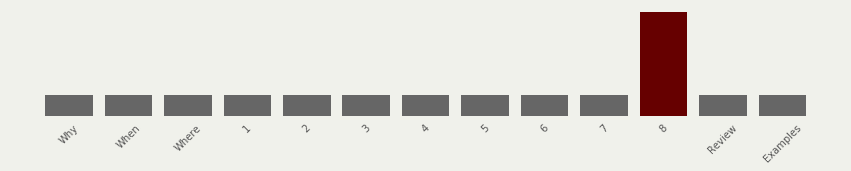

In [48]:
show_graph(10)

PEP8 had to be point 8, which is why I've saved this one for the end. 

### Good Abstractions
### KISS
### YAGNI
### DRY
### High Cohesion
### Low Coupling
... and all that jazz.

You're still writing good code (perhaps with horrible acronyms).

So you'll apply all the things you learned for software engineering *in the context of notebooks*.

One example is that running linearly enforces relationships in cells that are physically next to each other: if you followed what I said earlier and structured your notebook well, your sections should be cohesive.

If you were paying a lot of attention, and didn't introduce a lot of shared state; then larger-sub-sections of the notebook should be very loosely coupled with minimal dependencies.

You probably want to lean on YAGNI more than DRY: in most cases (except for nbdev, of course) your notebooks aren't going to be used as libraries. Keep the abstractions just enough to avoid copy pasting code -- don't build FactoryFactories.

Go read [The Pragmatic Programmer](https://pragprog.com/titles/tpp20/the-pragmatic-programmer-20th-anniversary-edition/)

- "Tools amplify your talent. The better your tools, and the better you know how to use them, the more productive you can be."
- "Names are deeply meaningful to your brain, and misleading names add chaos to your code."

Again, this is a field that has been covered well and thoughtfully: you'll get a much better return on your time by reading this book instead of hearing me ramble.

# The Style Guide

1. Explicitly, consciously manage global state.
2. Add small tests and assertions throughout the code.
3. Liberally add headings to create structure.
4. The notebook must be executable from top to bottom with a run-all.
5. Notebooks must be *meaningfully* reproducible.
6. Eliminate clutter across code, prose and outputs.
7. Treat the prose with care.
8. Treat the code with care.

... apply as necessary.

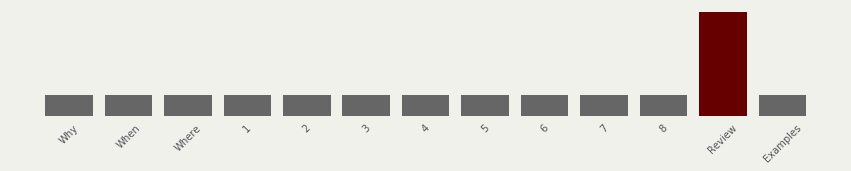

In [49]:
show_graph(11)

Taking it quickly from the top: 
- manage state as carefully as you can; treat it like uranium in a nuclear power plant -- things are pointless without it, but you want to be very, very careful with it and the side effects it could generate.
- have local tests and assertions sprinkled throughout the code; they'll let you iterate and debug much, much faster.
- structure the notebook well with headings and break it into cohesive sections.
- make sure it can be blindly re-executed from top-bottom; one of my personal tests for sloppy notebooks is to see if it fails with a run-all.
- make sure poor souls who have to re-use your notebook in the future can do so: it might be yourself. Capture or document all your dependencies, across hardware, software, data and other resources you might need.
- keep the notebook clean; remove any clutter in the code, prose or outputs -- keep it focused towards the reason for the notebook.
- notebooks *are* prose; treat them as such. Read "On writing well" or your style guide of choice.
- notebooks are *also* code; treat them as such. Don't forget your software engineering skills as you go.


Apply these for notebooks you plan to keep around, otherwise it's a waste of effort.

# Good notebooks to check out
- Pytudes by Peter Norvig: https://github.com/norvig/pytudes
- Advent of Code solutions by Martijn Pieters: https://github.com/mjpieters/adventofcode/blob/master/2019/Day%2002.ipynb
- Fast.ai's books


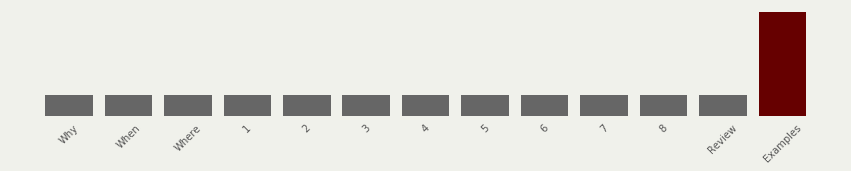

In [50]:
show_graph(12)

# References
- (beyond the books, slides and resources directly referenced already)
- [Space Telescope Science Institute Notebook Style Guide](https://github.com/spacetelescope/style-guides/blob/master/guides/jupyter-notebooks.md)
- [Clean Code in Jupyter Notebooks](https://www.slideshare.net/katenerush/clean-code-in-jupyter-notebooks)
- [Google Cloud Jupyter Notebook Manifesto](https://cloud.google.com/blog/products/ai-machine-learning/best-practices-that-can-improve-the-life-of-any-developer-using-jupyter-notebooks)
- [Coding standards for your Jupyter Notebooks](https://medium.com/@atma_mani/coding-standards-for-your-jupyter-notebooks-f4e2af7db3a9)
- [Jupyter Notebook Best Practices](https://towardsdatascience.com/jupyter-notebook-best-practices-f430a6ba8c69)
- [Literate Programming](http://www.literateprogramming.com/knuthweb.pdf)
---

# Thanks

* Caner Gocmen, Yaniv Schahar and Amir Shimoni for reviewing and giving feedback!

This talk is based off hard-won and painfully debugged experience, and excellent articles from around the web. It started it's life as an idea that was stuck in my head from almost a year ago, first manifesting as an often-edited blog post on expLog.

# Thank you!

## Comments, questions, feedback or advice?

---

## Tweet [@kunalbhalla](https://twitter.com/kunalbhalla)

## [kunalb@fb.com](mailto:kunalb@fb.com)

---

Cunningham's law: _"the best way to get the right answer on the internet is not to ask a question; it's to post the wrong answer."_

---
- Started as a blog post at https://explog.in/notes/nbstyle.html